In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### Fitting data to probability distribution
In parametric inference, specify a priori a suitable distribution, then choose the parameters that best fit the data.

- Method of moments chooses the parameters so that the sample moments (mean and variance typically) match that of the theoretcal moments of the chosen distribution.
- Maximum Likelihood chooses the parameters to maximize the likelihood, which measures how likely it is to observe from the given sample.

In [8]:
# density plot kernel dedity estimate 
help(pd.DataFrame.plot.density)

Help on function kde in module pandas.plotting._core:

kde(self, **kwds)
    Kernel Density Estimate plot
    
    .. versionadded:: 0.17.0
    
    Parameters
    ----------
    **kwds : optional
        Keyword arguments to pass on to :py:meth:`pandas.DataFrame.plot`.
    
    Returns
    -------
    axes : matplotlib.AxesSubplot or np.array of them



In [28]:
rain = pd.read_table("data/nashville_precip.txt", index_col = 0, na_values = "NA", delim_whitespace = True)
rain.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


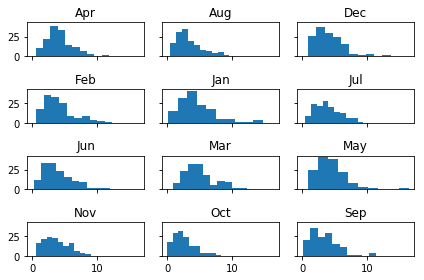

In [20]:
fig = plt.figure(figsize = (10, 10))

rain.hist(sharex = True, sharey = True, grid = False)
plt.tight_layout()
plt.show()

The first step is recognixing what sort of distribution to fit the data to. A couple of observations:

1. The data are skewed, with a longer tail to the right than to the left
2. The data are positive-valued, since they are measuring rainfall
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **gamma distribution**:

<div style="font-size: 100%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>


### MoM and MLE compare 

### The Method of Moments 
assigns the empirical parameters (could be mean and variance as in the assumed gamma distribution) to their theoretical counterparts, so that the parameters can be solved. 

for the gamma distribution, the mean and variance are:

<div style="font-size: 100%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

solve for these parameters, we can use a gamma distribution to describe our data:

<div style="font-size: 100%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

In [29]:
# there's missing value in October 
rain.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,141.000000,141.000000
mean,4.523688,4.097801,4.977589,4.204468,4.325674,3.873475,3.895461,3.367305,3.377660,2.610500,3.685887,4.176241
std,2.632273,2.348757,2.316343,2.029063,2.303564,2.243481,1.943454,1.944190,2.222633,1.661741,1.918143,2.327665
min,0.190000,0.630000,0.850000,0.520000,0.830000,0.210000,0.460000,0.510000,0.130000,0.020000,0.540000,0.910000
25%,2.810000,2.330000,3.340000,2.880000,2.870000,2.310000,2.470000,1.870000,1.790000,1.447500,2.140000,2.450000
50%,3.760000,3.680000,4.590000,3.850000,4.050000,3.300000,3.610000,2.890000,3.070000,2.230000,3.400000,3.910000
75%,5.890000,5.050000,6.130000,5.110000,5.540000,4.980000,5.260000,4.300000,4.520000,3.575000,5.090000,5.360000
max,14.750000,12.370000,12.350000,11.840000,16.430000,11.950000,9.430000,9.600000,11.440000,8.350000,9.040000,13.630000


In [34]:
print (rain.shape)
rain.columns

(141, 12)


Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [36]:
# help(rain.fillna)

In [30]:
# fill the NA in Oct with the mean precipitation in the month over the years.
rain.fillna(value = {'Oct': rain.Oct.mean()}, inplace = True).head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


calculate the sample moments of interest, the mean and varince by month.


In [42]:
rain_mean = rain.mean()
rain_var = rain.var()

use these moments to estimate $\alpha$ and $\beta$ for **each month**:

In [43]:
alpha_mom = rain_mean **2 / rain_var
beta_mom = rain_var / rain_mean

alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

use the `gamma.pdf` function in `scipy.stats.distributions` to plot the **ditribtuions implied by the calculated alphas and betas**. For example, here is January:

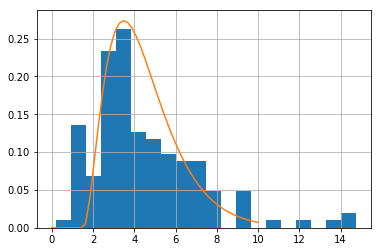

In [54]:
from scipy.stats.distributions import gamma

rain.Jan.hist(normed = True, bins = 20)

# calculated parameters are alpha_mom[0] and beta_mom[0] for Jan
# gamma pdf is only plottd over the x range of (0, 10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))


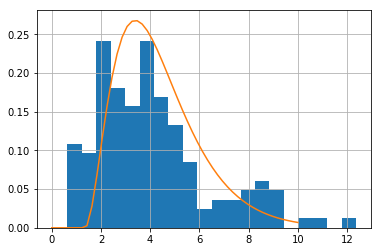

In [79]:
# for Feb, the caculated parameters gamma distribution

rain.Feb.hist(normed = True, bins = 20)

# calculated parameters are alpha_mom[0] and beta_mom[0] for Jan
# gamma pdf is only plottd over the x range of (0, 10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[1], beta_mom[1]))


loop over the months to create a grid of plots for the distribution of rainfall, using gamma distributions.

In [77]:
help(ax.get_xlim)

Help on method get_xlim in module matplotlib.axes._base:

get_xlim() method of matplotlib.axes._subplots.AxesSubplot instance
    Get the x-axis range
    
    Returns
    -------
    xlimits : tuple
        Returns the current x-axis limits as the tuple
        (`left`, `right`).
    
    Notes
    -----
    The x-axis may be inverted, in which case the `left` value will
    be greater than the `right` value.



In [83]:
# # axs = rain.hist gives the location of the suplots in the grid plot from the months
# axs = rain.hist(normed = True, figsize = (15, 15), sharex = True, sharey = True, bins = 15, grid = False)

# for ax in axs.ravel():
    
#     # get month/ get axes
#     m = ax.get_title 
    
#     # plot fitted distribution
# #     x = np.linspace(*ax.get_xlim())
# #     ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
#     ax.plot(np.linspace(0, 10), alpha_mom[m], beta_mom[])
    
#     # annotate with parametere estimates
#     label = "alpha = {}\nbeta = {}".format(alpha_mom[m], beta_mom[m])
#     ax.annotate(label, xy = (10, 0.2))

### MLE 
MLE is preferred than MoM as the results have good theoretical properties.

Suppose there is a sample $x = x_1,x_2,\ldots,x_n$ of **n independent and identically distributed observations**, coming from a distribution with an unknown probability density function f0(.). It is however summarized that the function f0 belongs to a certain **family of distributions {f(.|θ), θ ∈ Θ}**, where θ is a vector of parameters for this family, called the parametric model.
Therefore, f0 = f(.|θ0). θ0 is unknown and is referred to as the tru vlaue of the parameter vector. The goal is to find an estimator θ hat that is as close to θ0 as possible.

To use MLE, **first specify the join density of the sample observations**. Sample observations are independent and identically distiburted from the same distribution.

<div style="font-size: 100%;">  
$$f(x_1, x_2, x_3,...,x_n| \theta) = f(x_1|\theta) f(x_2|\theta) f(x_3|\theta) ... f(x_n|\theta)$$
</div>

Look at the joint probability function from a different perspective by considering the observed sample values x1, x2, …, xn to be fixed "parameters" of the function, whereas θ will be the function's variable and allowed to vary freely; this same function will be called the **likelihood**:

<div style="font-size: 100%;">  
$$L(\theta; x_1, x_2, x_3,...,x_n) = f(x_1, x_2, x_3,...,x_n| \theta) = f(x_1|\theta) f(x_2|\theta) f(x_3|\theta) ... f(x_n|\theta)$$
</div>


Note that " ; " denotes a **separation between the two categories of input arguments**: the parameters θ and the observations x1, x2, ..., xn.

It is often more convenient when working with the natural logarithm of the likelihood function, called the** log-likelihood**:

<div style="font-size: 100%;">  
$$ln(L(\theta; x_1, x_2, x_3,...,x_n)) = ln(\prod_{i=1}^n f(x_i | \theta))  = \sum_{i=1}^n \ln f(x_i|\theta)$$
</div>

MLE estimates the value of θ0 by finding the θ that maximizes log-likelihood function.

### Poisson distribution family 

For example the observed sample data are i.i.d. from **Poisson distribution**, which is of some discrete random variable used for counting usually.

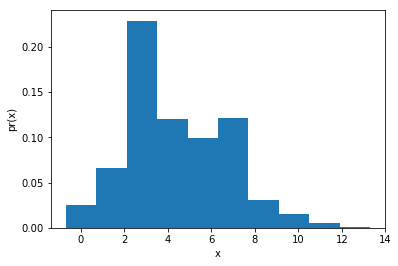

In [135]:
# histogram, area of the bin measures the frequency of the poisson sample falls into the bin
# np.random.poisson draws sample from the poisson distribution
x = np.random.poisson(5, size = 1000)
plt.hist(x, bins = 10, normed = True, align = 'left')
plt.xlabel("x")
plt.ylabel("pr(x)")

In [136]:
# help(np.random.poisson)

### How likely is the probability model given these data.
The joint probability density function $\prod_{i=1}^n Pr(x_i | \theta)$ gives a measure of how **likely **it is to observe the sample values x1, x2,...,xn, given the parameter theta.

Maximum likelihood fitting consists of choosing the appropriate **likelihood function**,

<div style="font-size: 100%;"> 
$$L(\theta; x_1, x_2, x_3,.,x_n) = Pr(x_1, x_2, x_3,.,x_n| \theta) = Pr(x_1|\theta) Pr(x_2|\theta) Pr(x_3|\theta)Pr(x_n|\theta) = \prod_{i=1}^n Pr(x_i|\theta)$$
</div>


,which is a measure of** how likely the observations are** ( like saying that the observations are fixed, but the parameters are allowed to vary freely), if the model is true.

Suppose the observed sample data are drawn from the Poisson distribution with parameter $\lambda =5$.
The following is the likelihood function for one point x:
$$L(x|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

In [92]:
# probability mass function of this Poisson distrbution with parameter lambda 5
poisson_like = lambda x, lam: np.exp(-lam)*(lam**x)/(np.arange(x) + 1).prod()

# test 
lam = 6 
x_value = 10
poisson_like(x_value, lam)

0.041303093412337726

### Probability mass function of Possion distribution with different parameter vlaues. 

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


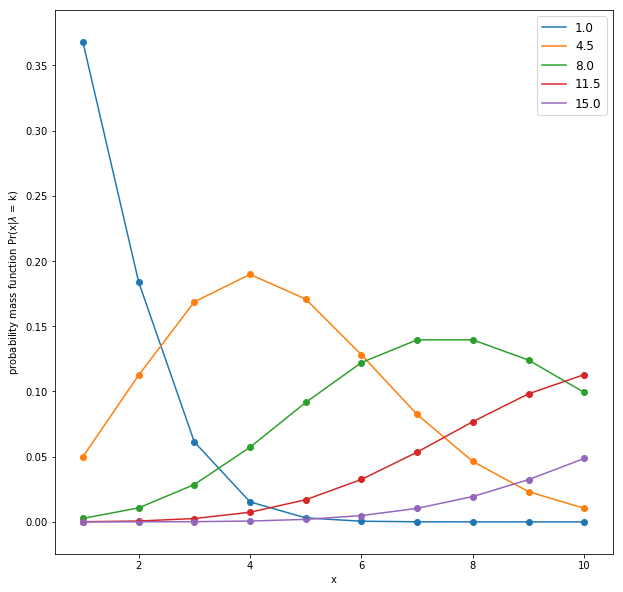

In [190]:
# the x array used to make the histogram before
x_values = np.random.poisson(5, size = 100)

# different parameter values 
lambdas = np.linspace(1, 15, 5)

plot = plt.figure(figsize = (10, 10))
for lam in lambdas:

    plt.scatter(np.unique(x_values), [poisson_like(x, lam) for x in np.unique(x_values)])
    plt.plot(np.unique(x_values), [poisson_like(x, lam) for x in np.unique(x_values)])
    plt.xlabel('x')
    plt.ylabel('probability mass function Pr(x|$\lambda$ = k)')
    
    plt.legend(lambdas, fontsize = 12)
    plot.show()
    

In [172]:
# Returns the sorted unique elements of an array
print (np.unique(x_values))

[ 0  1  2  3  4  5  6  7  8 10 11]


### Likelihood function with varying value of parameters and several 'fixed' observed data sample
(the other way to look at the probability mass function) 

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


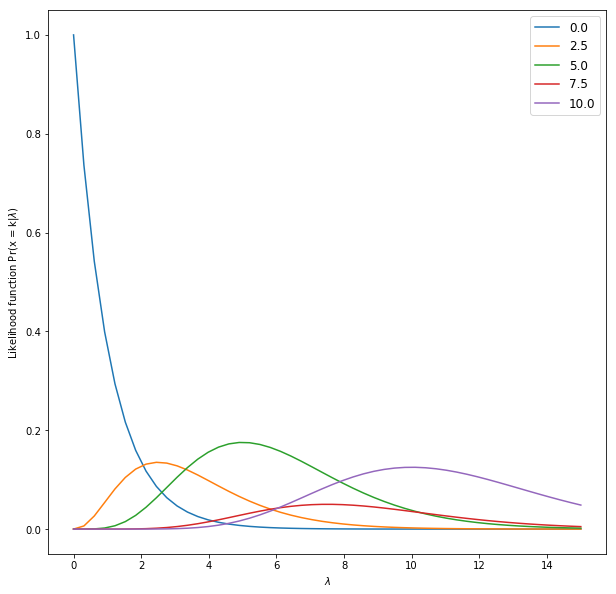

In [189]:
# the x array used to make the histogram before
x_values = np.linspace(0, 10, 5)

# different parameter values, num of elements in linspace as default is 50
lambdas = np.linspace(0, 15)

plot = plt.figure(figsize = (10, 10))
for x in x_values:

    plt.plot(lambdas, [poisson_like(x, lam) for lam in lambdas])
    plt.xlabel('$\lambda$')
    plt.ylabel('Likelihood function Pr(x = k|$\lambda$)')
    
    plt.legend(x_values, fontsize = 12)
    plot.show()
    

### Likelihood function vs PMF
- The likelihood is a function of the parameter(s) given the data
- The PDF returns the probability of data given a particular parameter value.

### Finding the MLE

**Numerical optimization** alogarithms take an initial "guess" at the solution, and iteratively improve the guess until it gets "close enough" to the answer.

Newton-Raphson algorithm:

<div style="font-size: 100%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

The following is a graphical example of how Newtone-Raphson converges on a solution, using an arbitrary function:

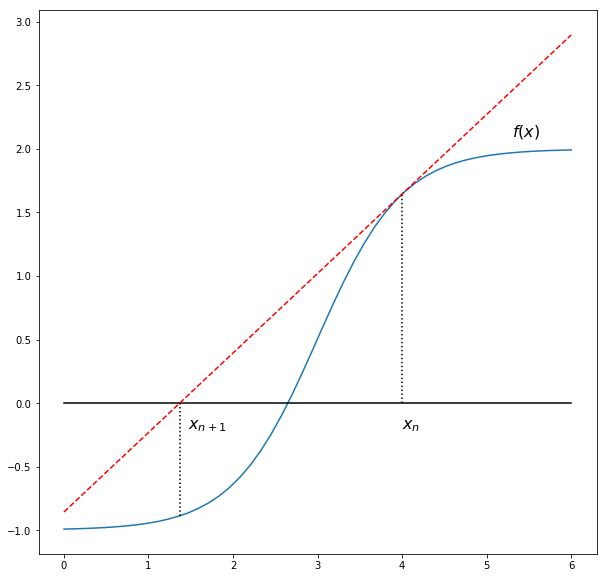

In [199]:
from scipy.optimize import newton
# location of the starting points affect optimization results 

# arbitrary function 
func = lambda x: 3./(1 + 400*np.exp(-2*x)) -1

plot = plt.figure(figsize = (10, 10))
x_val = np.linspace(0, 6)

# the function 
plt.plot(x_val, func(x_val))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n 
plt.plot([4, 4], [0, func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize = 16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(x_val, tanline(x_val), "r--")

# plot at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime + .1, -.2, '$x_{n+1}$', fontsize = 16)




To apply the Newton-Raphson algorithm, a function that returns a vector containing the first and second derivatives of the function with respect to the variable of interest is needed. In the case of gamma parameter MLE, this is:


### Kernel estimation

A kernel is a special type of probability density function (PDF) with the added property that it must be even.  Thus, a kernel is a function with the following properties
- non-negative
- real-valued
- even
- its definite integral over its support set must equal to 1


Some common PDFs are kernels; they include the Uniform(-1,1) and standard normal distributions.



**Kernel density estimation** is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable. 

It is non-parametric because it does not assume any underlying distribution for the variable.  Essentially, at every data, a kernel function is created with the data at its centre – this ensures that the kernel is symmetric about the data.  The PDF is then estimated by adding all of these kernel functions and dividing by the number of data to ensure that it satisfies the 2 properties of a PDF:
- Every possible value of the PDF (i.e. the function, f(x)), is non-negative.
- The definite integral of the PDF over its support set equals to 1.


Intuitively, a kernel density estimate is a sum of “bumps”.  A “bump” is assigned to every data, and the size of the “bump” represents the probability assigned at the neighbourhood of values around that data; thus, if the data set contains
- 2 data at x = 1.5
- 1 datum at x = 0.5
then the “bump” at x = 1.5 is twice as big as the “bump” at x = 0.5.

Each “bump” is centred at the data, and it spreads out symmetrically to cover the data’s neighbouring values.  Each kernel has a bandwidth, and it determines the width of the “bump” (the width of the neighbourhood of values to which probability is assigned).  A bigger bandwidth results in a shorter and wider “bump” that spreads out farther from the centre and assigns more probability to the neighbouring values.
Constructing a Kernel Density Estimate: Step by Step
1) Choose a kernel; the common ones are normal (Gaussian), uniform (rectangular), and triangular.
2) At each datum, x_i, build the scaled kernel function
h^{-1}K[(x - x_i)/h], where K() is your chosen kernel function.  The parameter h is called the bandwidth, the window width, or the smoothing parameter.
3) Add all of the individual scaled kernel functions and divide by n; this places a probability of 1/n to each x_i.  It also ensures that the kernel density estimate integrates to 1 over its support set.

It turns out that the choosing the bandwidth is the most difficult step in creating a good kernel density estimate that captures the underlying distribution of the variable.  Here are some useful guidelines:
- A small h results in a small standard deviation, and the kernel places most of the probability on the data.  Use this when the sample size is large and the data are tightly packed.
- A large h results in a large standard deviation, and the kernel spreads more of the probability from the data to its neighbouring values.  Use this when the sample size is small and the data are sparse.

In [201]:
# some random data 
y = np.random.random(15)*10
y

array([ 9.67645495,  8.12036573,  6.46189048,  8.91154922,  1.65069382,
        0.73251128,  7.10304547,  4.02437632,  7.92198336,  4.83587781,
        3.21970247,  7.64560988,  3.26028813,  2.18631294,  4.47958532])

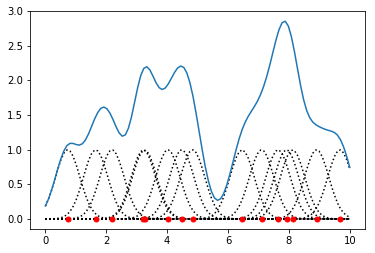

In [225]:
from scipy.stats.distributions import norm

x = np.linspace(0, 10, 100)

# smoothing parameter
s = 0.4

# calculate the kernels
# kernel function is norm.pdf, which returns the Probability density function evaluated at x
# probabilities from all combination of x and y values 
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

# plot x against kernels 
plt.plot(x, kernels, "k:")

# sum over the probabilities assigned at each data point 
plt.plot(x, kernels.sum(axis = 1))

# kernels are built using the data as the center 
plt.plot(y, np.zeros(len(y)), "ro", ms = 5)

In [221]:
print (kernels.shape)
print (len([norm.pdf(x, yi, s) for yi in y]))
print ([norm.pdf(x, yi, s) for yi in y][0].shape)

(100, 15)
15
(100,)


SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth.

The following creates a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [235]:
# mixture of normal models 
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# append by row 
x = np.r_[x1, x2]

(100,)

In [255]:
l = [x1, x2]
flatted = [bit for item in l for bit in item ]

# or flatten list of lists using the following 
p = np.ravel(np.array(l))


(100,)

(array([ 0.02660373,  0.03325466,  0.05320746,  0.0399056 ,  0.08646212,
         0.16627331,  0.19952798,  0.05985839]),
 array([-5.41653838, -3.91298983, -2.40944128, -0.90589273,  0.59765582,
         2.10120437,  3.60475292,  5.10830147,  6.61185002]),
 <a list of 8 Patch objects>)

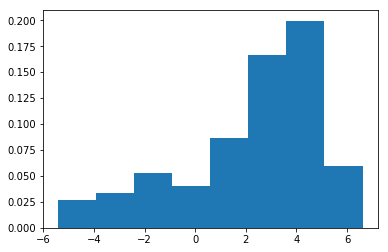

In [256]:
plt.hist(x, bins = 8, normed = True )

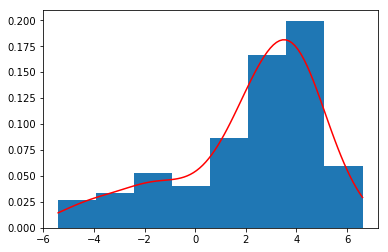

In [258]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins =8, normed = True)
plt.plot(xgrid, density(xgrid), "r-")

### Regression model

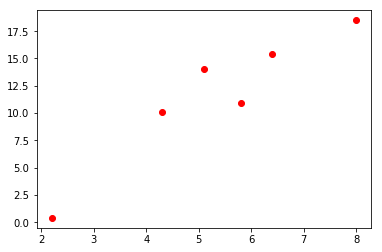

In [259]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,'ro')

<div style="font-size: 100%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 100%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

Select the parameters that minimize the squared error of the model.

<div style="font-size: 100%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>
Squaring serves two purposes: 
(1) to prevent positive and negative values from cancelling each other out and 
(2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.


In [263]:
# the sum of squared error defined function 
ss = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)
ss([0, 1], x, y)

333.35000000000002

In [265]:
from scipy.optimize import fmin

b0, b1 = fmin(ss, [0,1], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

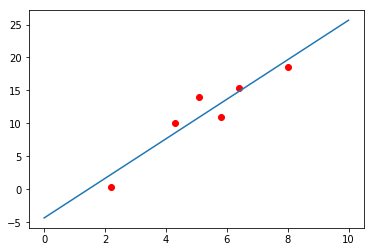

In [266]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0 + b1 * 10])

Represent a curved relationship between our variables by introducing **polynomial** terms. The reuling model is a linear one still, as linear in parameters. For example, a cubic model:

<div style="font-size: 100%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
-11.0748186039 6.0576975948 -0.302681057088


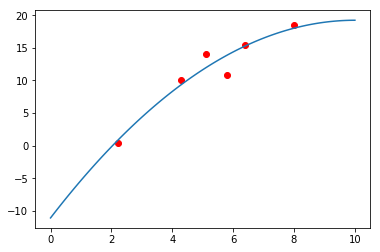

In [267]:
ss2 = lambda theta, x, y: np.sum((y - theta[0] - theta[1] * x - theta[2] * (x ** 2)) ** 2)

# The fmin method, uses a Nelder-Mead simplex algorithm, only uses function values, not derivatives or second derivatives.
b0, b1, b2 = fmin(ss2, [1, 1, -1], args = (x, y))
print (b0, b1, b2)

plt.plot(x, y, 'ro')
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, b0 + b1 * xvals + b2 * (xvals ** 2))

In [269]:
## fit the least square model

import statsmodels.api as sm

straight_line = sm.OLS(y, sm.add_constant(x)).fit()
straight_line.summary()

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     32.67
Date:                Fri, 22 Sep 2017   Prob (F-statistic):            0.00463
Time:                        00:35:53   Log-Likelihood:                -12.325
No. Observations:                   6   AIC:                             28.65
Df Residuals:                       4   BIC:                             28.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3500      2.937     -1.481      0.213     -12.505       3.805
x1             3.0000      0.525      5.716      0.005       1.543       4.457
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.387
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.570
Skew:                           0.359   Prob(JB):                        0.752
Kurtosis:                       1.671   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
from statsmodels.formula.api import ols as OLS

data = pd.DataFrame(dict(x = x, y = y))
cubic_fit = OLS('y ~ x + I(x ** 2)', data).fit()

cubic_fit.summary()


/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     19.50
Date:                Fri, 22 Sep 2017   Prob (F-statistic):             0.0191
Time:                        00:37:17   Log-Likelihood:                -11.056
No. Observations:                   6   AIC:                             28.11
Df Residuals:                       3   BIC:                             27.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0748      6.013     -1.842      0.163     -30.211       8.062
x              6.0577      2.482      2.441      0.092      -1.840      13.955
I(x ** 2)     -0.3027      0.241     -1.257      0.298      -1.069       0.464
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.711
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.655
Skew:                          -0.809   Prob(JB):                        0.721
Kurtosis:                       2.961   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model selection 

Optimization terminated successfully.
         Current function value: 7.015262
         Iterations: 663
         Function evaluations: 983


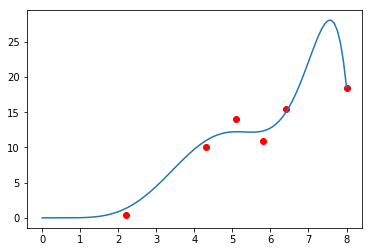

In [274]:
## fitting a 9-th order polynomial to the sample data from the above example certainly results in an overfit.

def calc_poly(params, data):
        x = np.c_[[data**i for i in range(len(params))]]
        return np.dot(params, x)
    
ssp = lambda theta, x, y: np.sum((y - calc_poly(theta, x)) ** 2)
betas = fmin(ssp, np.zeros(10), args = (x,y), maxiter = 1e6)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, max(x), 100)
plt.plot(xvals, calc_poly(betas, xvals))

 **Akaike's Information Criterion (AIC)** balances the fit of the model (in terms of the likelihood) with the **number of parameters**(against overfitting) required to achieve that fit.

$$AIC = n \log(\hat{\sigma}^2) + 2p$$

where $p$ is the number of parameters in the model and $\hat{\sigma}^2 = RSS/(n-p-1)$.

As the number of parameters increase, the residual sum of squares goes down, but the second term (a penalty) increases.

To apply AIC to model selection,the model that has the **lowest** AIC value should be chosen.

In [275]:
n = len(x)

aic = lambda rss, p, n: n * np.log(rss /(n - p - 1)) + 2*p

RSS1 = ss(fmin(ss, [0, 1], args = (x, y)), x, y)
RSS2 = ss2(fmin(ss2, [1, 1,-1], args = (x, y)), x, y)

print( aic(RSS1, 2, n), aic(RSS2, 3, n))

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
15.7816583572 17.6759368019


### Logistic Regression 
in dichotomous data 

In [280]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.name

ImportError: No module named 'xlrd'